In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [1]:
# Importing main libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Making a dataframe out of the given csv file
df = pd.read_csv('hiring.csv')
df.head(3)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000


In [3]:
# Converting the NA values to zero since those candidates probably didn't have any work experience.
df['experience'].fillna(value='zero', inplace=True)
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [4]:
# Using w2n from word2number to convert the words to numbers in experience column.
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)

In [6]:
# Replaced NA values in test score column to the mean value
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean(), inplace=True)

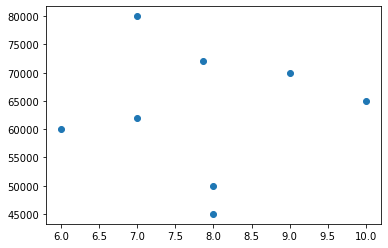

In [7]:
plt.scatter(df['test_score(out of 10)'], df['salary($)'])

### Machine Learning Part

In [8]:
X = df.drop('salary($)', 1)
y = df['salary($)']

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
model.score(X, y)

0.9639958361860578

In [11]:
# Finding the required salary given the inputs
model.predict([[2, 9, 6]])

array([53290.89255945])

In [12]:
model.predict([[12, 10, 10]])

array([92268.07227784])